In [2]:
import pandas as pd
import re
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import main

Text(0, 0.5, 'Latitude')

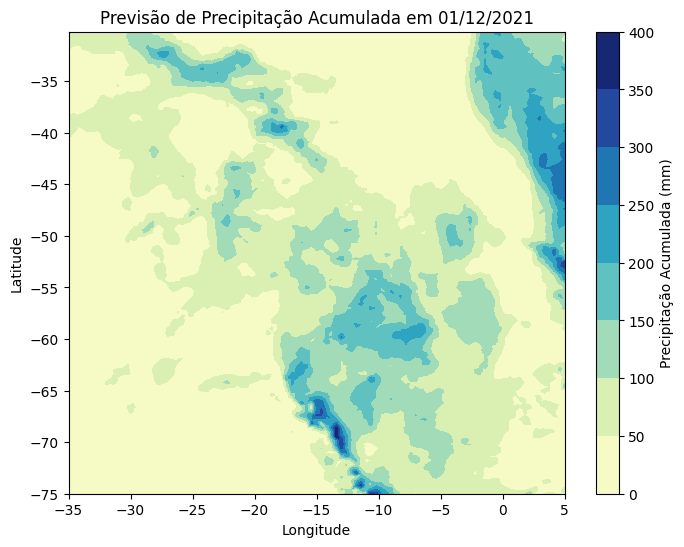

In [12]:
#mapeamento em heatmap para ver todo a precipitação em "ondas" de toda a base ETA.

nomes_arquivos = main.lista_arquvios(pasta="forecast_files")

df_final = []
for arquivo in nomes_arquivos:

    #lendo o arquivo ETA
    df_forcast_file = pd.DataFrame(main.read_data_file(f'forecast_files/{arquivo}'))
    
    
    df_final.append(df_forcast_file)

# Mesclando DataFrames usando merge encadeado
merged_df = pd.merge(df_final[0], df_final[1], on=['lat', 'long'], how='inner')

merged_df['data_value'] = merged_df['data_value_x'] + merged_df['data_value_y']
del merged_df['data_value_x']
del merged_df['data_value_y']

for df in df_final[2:]:
    merged_df = pd.merge(merged_df, df, on=['lat', 'long'], how='inner')
    merged_df['data_value'] = merged_df['data_value_x'] + merged_df['data_value_y']
    del merged_df['data_value_x']
    del merged_df['data_value_y']

plt.figure(figsize=(8, 6))
contour_plot = plt.tricontourf(merged_df['long'], merged_df['lat'], merged_df['data_value'], cmap='YlGnBu')
plt.colorbar(contour_plot, label='Precipitação Acumulada (mm)')
plt.title('Previsão de Precipitação Acumulada em 01/12/2021')
plt.xlabel('Longitude')
plt.ylabel('Latitude')



Text(0.5, 1.0, 'Carmargos - Bacia do grande')

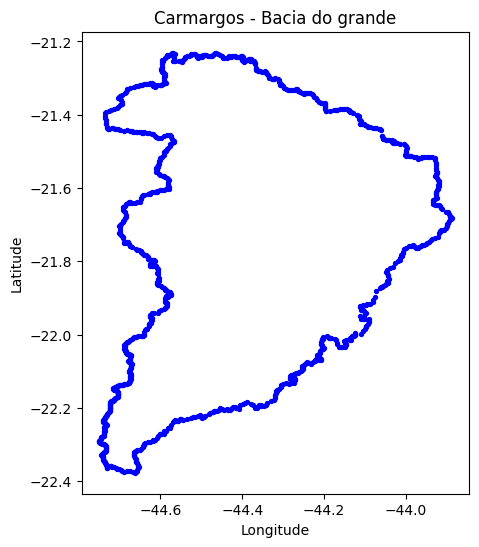

In [16]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
df_contour = main.read_contour_file('PSATCMG_CAMARGOS.bln')

#criacao do mapa da bacia do grande para identificar o range de latitude e longitude para aplciar a ampliação do heatmap
plt.figure(figsize=(5, 6)) 
plt.scatter(df_contour['lat'], df_contour['long'], color='blue', marker='o', s=8)  
plt.xlabel('Longitude')  
plt.ylabel('Latitude')  
plt.title('Carmargos - Bacia do grande') 

Text(0, 0.5, 'Latitude')

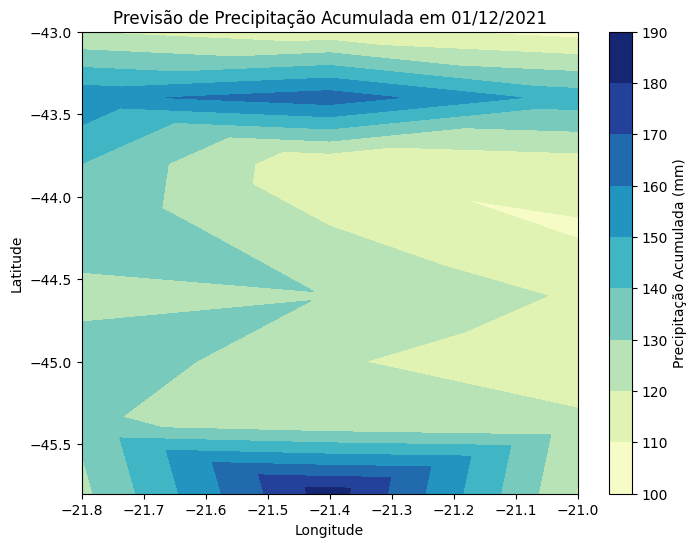

In [17]:
for x, y in merged_df.iterrows():
    if y['lat'] < -46 or y['lat'] > -43:
        merged_df.drop(x, inplace=True)
    elif y['long'] < -22 or y['long'] > -21:
        merged_df.drop(x, inplace=True)


plt.figure(figsize=(8, 6))
contour_plot = plt.tricontourf(merged_df['long'], merged_df['lat'], merged_df['data_value'], cmap='YlGnBu')
plt.colorbar(contour_plot, label='Precipitação Acumulada (mm)')
plt.title('Previsão de Precipitação Acumulada em 01/12/2021')
plt.xlabel('Longitude')
plt.ylabel('Latitude')